# Initial mortality and recovery in reported cases of COVID-19 a few weeks into the pandemic

## Carlos Ignacio Herrera-Nolasco$^1$, Alejandro Joel Herrera-McKiernan$^2$, 
## Emilio Arieli Herrera-McKiernan$^3$, Eugenia O'Reilly-Regueiro$^4$,
## Marco Arieli Herrera-Valdez$^1$

#### $^1$ Departamento de Matemáticas, Facultad de Ciencias, Universidad Nacional Autónoma de México
#### $^2$ Escuela Primaria República de Guatemala, Secretaría de Educación Pública, México
#### $^3$ Escuela Secundaria Vicente Guerrero, Secretaría de Educación Pública, México
#### $^4$ Instituto de Matemáticas, Facultad de Ciencias, Universidad Nacional Autónoma de México


#### Abstract

We inspected the time series of the cases and deaths reported by country during the initial weeks of the COVID-19 pandemic, in the first months of the year. From the time series is possible to observe different starting points of the epidemic due in part to the intrinsic dynamics of propagation of the disease around the world, and possibly due to the unavoidable under report that always occurs in these situations. Taking these factors into account, we focus on the deaths by case as the most important indicator of the dynamics, and calculated the case fatality ratios for different countries. We also examine the qualitative dynamics of the time series in an attempt to provide comparative information about the fatality associated to the epidemic in different parts o world. In doing so, we describe some common trends, highlight noticeable departures from the trends that open questions that are important to understand specific aspects of the epidemics. We also pose some questions that could be answered combining mathematical modelling and data analysis, as time passes and more data is available. Although the sampling for cases in many countries is biased to those people that sought medical attention, the case fatality ratios provide an estimate for the mortality rate for infected individuals. 


#### Methods and data sources

The data was downloaded from the repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) (https://github.com/CSSEGISandData/COVID-19). All calculations were performed using Python version 3.82 (https://www.python.org/) and the modules numpy (https://numpy.org/), matplotlib (https://matplotlib.org/), and pandas (https://pandas.pydata.org/). A JuPyTeR notebook with the analysis and calculations performed here can be found at 



Module imports (all basic functions and other module specs can be found in [tsam_COVID19_baseCode.py](tsam_COVID19_baseCode.py)

In [310]:
from tsam_COVID19_baseCode import *
%matplotlib inline 


In [311]:
srcDir='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
urlCases = srcDir+'time_series_covid19_confirmed_global.csv'
urlDeaths = srcDir+'time_series_covid19_deaths_global.csv'
urlRecov = srcDir+'time_series_covid19_recovered_global.csv'
cases = pd.read_csv(urlCases,index_col=None)
deathCases = pd.read_csv(urlDeaths,index_col=None)
recov = pd.read_csv(urlRecov,index_col=None)

Let us first describe the data set. The data has been transposed so that the cases, deaths, and recovered the different regions of the world are stored in columns, each with the data from different dates starting from January 22, 2020. 

In [312]:
cases.head(6)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,174,237,273,281,299,349,367,423,444,484
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,409
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,716,847,986,1171,1251,1320,1423,1468,1572,1666
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,583
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,19
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,7,7,9,15,15,15,15,19,19,19


In [313]:
deathCases.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
258,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This means there are 4 columns before the time series begins, and the data contains 248 regions from the world. The data that can be used for calculations involving the cases in the epidemic can be found from the fifth row on.  Since the dates in the original data have only two numbers for the year, let us create a date range with the dates formatted with a four figures, and use the new dates later for the plots and illustrations.

In [346]:
# ------------------------------
# Description of the data so that the headers and the columns
# without case data are distinguished
# ------------------------------
nRows,nCols=cases.shape
cases.head(10)
nHeaderRows=1;
#
nHeaderCols=3
# how to generate date lists from a baseline using the datetime
dates = cases.columns[4:]
nDays = len(dates)
print('Got data from %d Dates:\n'%(len(dates)))
print(dates)


Got data from 79 Dates:

Index([u'1/22/20', u'1/23/20', u'1/24/20', u'1/25/20', u'1/26/20', u'1/27/20',
       u'1/28/20', u'1/29/20', u'1/30/20', u'1/31/20', u'2/1/20', u'2/2/20',
       u'2/3/20', u'2/4/20', u'2/5/20', u'2/6/20', u'2/7/20', u'2/8/20',
       u'2/9/20', u'2/10/20', u'2/11/20', u'2/12/20', u'2/13/20', u'2/14/20',
       u'2/15/20', u'2/16/20', u'2/17/20', u'2/18/20', u'2/19/20', u'2/20/20',
       u'2/21/20', u'2/22/20', u'2/23/20', u'2/24/20', u'2/25/20', u'2/26/20',
       u'2/27/20', u'2/28/20', u'2/29/20', u'3/1/20', u'3/2/20', u'3/3/20',
       u'3/4/20', u'3/5/20', u'3/6/20', u'3/7/20', u'3/8/20', u'3/9/20',
       u'3/10/20', u'3/11/20', u'3/12/20', u'3/13/20', u'3/14/20', u'3/15/20',
       u'3/16/20', u'3/17/20', u'3/18/20', u'3/19/20', u'3/20/20', u'3/21/20',
       u'3/22/20', u'3/23/20', u'3/24/20', u'3/25/20', u'3/26/20', u'3/27/20',
       u'3/28/20', u'3/29/20', u'3/30/20', u'3/31/20', u'4/1/20', u'4/2/20',
       u'4/3/20', u'4/4/20', u'4/5/20', u'4/6/2

In [347]:
# -------------------
print("""""")
# -------------------
npCases = cases.to_numpy()
countries = np.unique(npCases[:,1])
nCountries = len(countries)

Data curation observations.
- Some countries report by province. This allows examination of the time series with a better spatial resolution.
The countries where there are reports by province are China, United Kingdom, Australia, and Canada.
- Arrays that include whole country cases, deaths, and recovered obtained
and separated for analysis
- Recovered are treated separately because reports do not include as many places as cases or deaths
- Case fatality ratios are calculated to analyse the epidemia in different provinces and contrast with whole country estimates


In [348]:
# -------------------
# Gather same country data
# -------------------
gCases, countries_Cases= sortDataByCountry(cases, nHeaderCols)
gDeaths,countries_Deaths = sortDataByCountry(deathCases, nHeaderCols)
gRecov,countries_Recov = sortDataByCountry(recov, nHeaderCols)

# -------------------
# Sum the counts from each country and construct a new array
# -------------------
# These arrays have the same size as the countries array (unique countries)
totCases=gatherDataByCountry(df=cases,nHeaderCols=4)
totDeathCases=gatherDataByCountry(df=deathCases,nHeaderCols=4)
totRecov=gatherDataByCountry(df=recov,nHeaderCols=4)


## Cases vs deaths in some subsets of countries

In [349]:
# -------------------
# Search regions to illustrate the case-fatality ratios
# -------------------
Pops_Millions = {'China':1439323776, 'Japan':126476461,'Korea, South':51269185, 'Indonesia':273523615, 'Singapore':5850342, 'Mexico':128932753,
'US':331002651, 'Canada':37742154, 'Argentina':45195774, 'Brazil':212559417, 'Colombia':50882891, 'Niger':24206644, 'Algeria':43851044, 'Egypt':102334404, 
                'South Africa':59308690,'Spain':46754778,'Italy':60461826,'France':67886011,'Germany':83783942, 'Australia':25499884,
                'United Kingdom':67886011,'Iran':83992949,'Israel':8655535}
#
R1=['China','Japan','Korea, South','Indonesia','Singapore','Australia']
R2=['United Kingdom','Spain','Italy','France']
#America=['Mexico','US','Argentina','Brazil','Colombia','Chile']
LatinAmerica=['Mexico','Argentina','Brazil','Colombia']
Africa=['Niger','Algeria','Egypt','South Africa']
R3=['US','Canada','Germany']
R4 =['Iran','Israel']
#MiddleEast =['Iran','Lebanon', 'West Bank and Gaza','Israel']
regions=[R1,LatinAmerica+Africa,R3+R4,R2]
#
ii = getIndsRegions(countries, regions)

In [350]:
# -------------------
# Search regions to illustrate the case-fatality ratios
# -------------------
Pops_Millions = {'China':1439323776, 'Japan':126476461,'Korea, South':51269185, 'Indonesia':273523615, 
                 'Singapore':5850342, 'Mexico':128932753,'US':331002651, 'Canada':37742154, 'Argentina':45195774,
                 'Brazil':212559417, 'Colombia':50882891, 'Niger':24206644, 'Algeria':43851044, 'Egypt':102334404, 
                 'South Africa':59308690,'Spain':46754778,'Italy':60461826,'France':67886011,'Germany':83783942, 
                 'Australia':25499884,'United Kingdom':67886011,'Iran':83992949,'Israel':8655535}
# Setup regions
R1=['China','Japan','Korea, South','Indonesia','Singapore','Australia']
R2=['United Kingdom','Spain','Italy','France']
#America=['Mexico','US','Argentina','Brazil','Colombia','Chile']
LatinAmerica=['Mexico','Argentina','Brazil','Colombia']
Africa=['Niger','Algeria','Egypt','South Africa']
R3=['US','Canada','Germany']
R4 =['Iran','Israel']
#MiddleEast =['Iran','Lebanon', 'West Bank and Gaza','Israel']
regions=[R1,LatinAmerica+Africa,R3+R4,R2]
#
ii = getIndsRegions(countries, regions)


Function to plot the CFR in different subsets of countries chosen specifically to illustrate different dynamics

In [351]:
#
def plotCasesDeathsTS(casesTS,deathCasesTS,regions,countries, convFactor=1000):
    ii = getIndsRegions(countries, regions)
    figu= gr.figure(figsize=(15,9))
    figu.suptitle('Deaths vs cases per %d habitants'%convFactor)
    gr.ioff(); ax=list(); sax=list(); cols=2
    rows = np.int32(np.ceil(len(regions)/cols))
    ticks= np.arange(0,nDays,7)
    for n in range(len(regions)):
        ax.append(figu.add_subplot(rows,cols,n+1))
        sax.append(inset_axes(parent_axes=ax[n],
                                width="30%", # width = 30% of parent_bbox
                                height="30%", # height : 1 inch
                                loc='lower right'))
        region=ii[n]
        for nn in range(len(region)):
            cas=convFactor*np.float64(casesTS[region[nn]])/Pops_Millions[countries[region[nn]]]
            dea=convFactor*np.float64(deathCasesTS[region[nn]])/Pops_Millions[countries[region[nn]]]
            ax[n].plot(cas,dea,'-',label=countries[region[nn]])
            ax[n].set_xlabel(r'cases per %d habitants'%convFactor)
            ax[n].set_ylabel(r'deaths per %d habitants'%convFactor)
            sax[n].plot(cas,dea,'-',label=countries[region[nn]])
        ymm= ax[n].get_ylim()[1]/3
        xmm= ax[n].get_xlim()[1]/3
        sax[n].set_ylim(0.0,ymm);  sax[n].set_xlim(0.0,xmm)
        ax[n].legend(ncol=6,loc='upper left',fontsize=8)
    figu.subplots_adjust(left=0.075,bottom=0.075,right=0.97,top=0.95,wspace=0.2,hspace=0.25)
    gr.ion(); gr.draw(); gr.show()
    return figu


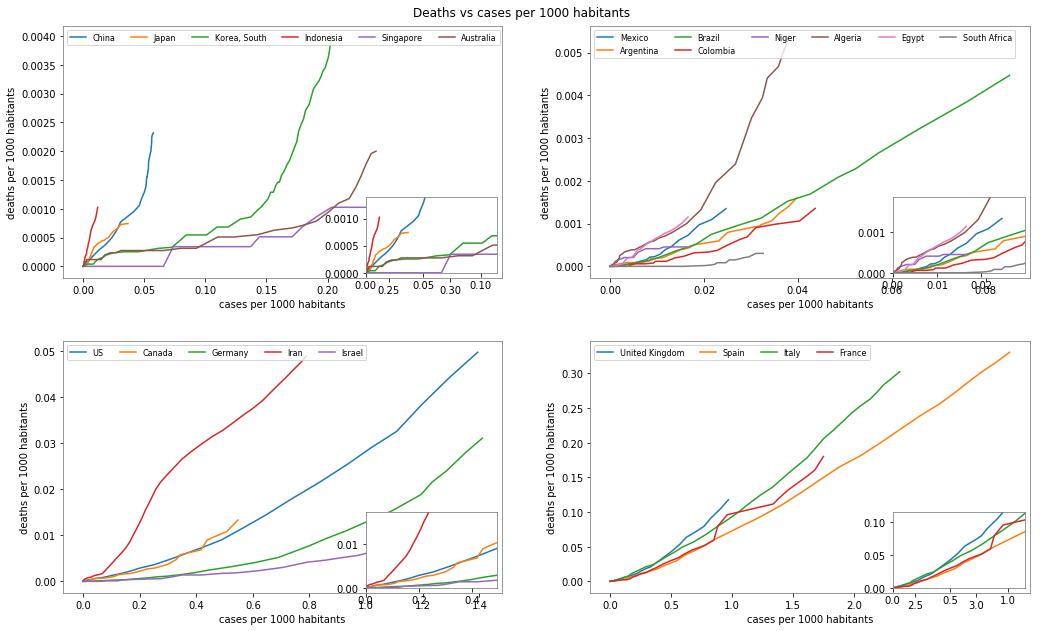

In [352]:

figu=plotCasesDeathsTS(casesTS=totCases,deathCasesTS=totDeathCases,regions=regions,countries=countries)
strCasesDeaths='tsam_COVID19_JHU_cases-deaths1000.png'
figu.savefig('./'+strCasesDeaths)


## Case-fatality ratios 

The case fatality ratio is an approximation for the probability of death among cases in an epidemic. In fact, it is an upper bound for the proportion of deaths due to infection, assuming that people that have not been confirmed do not have a higher probability of dying because of the infection.

The case-fatality ratios can be calculated by dividing each entry in the deaths data frame, by the corresponding entry in the cases data frame.


In [353]:
cfr= correctedArrayRatio(totDeathCases,totCases)

Search regions to illustrate the case-fatality ratios

In [354]:
#
def plotCFRTS(cfr,dates,regions,countries,move2start=1):
    cfr=100*cfr
    ii = getIndsRegions(countries, regions)
    figu = gr.figure(figsize=(15,9))
    figu.suptitle('Percentage of dead/confirmed between %s-%s'''%(dates[0],dates[-1]))
    ax=list(); gr.ioff()
    cols=2
    rows = np.int32(np.ceil(len(regions)/cols))
    ticks= np.arange(0,nDays,7)
    for n in range(len(regions)):
        ax.append(figu.add_subplot(rows,cols,n+1))
        region=ii[n];
        for nn in range(len(region)):
            thisCFR=cfr[region[nn]]
            ax[n].set_xticks(ticks)
            if move2start:
                startInd = np.maximum( np.where(thisCFR>0)[0].min(),0)
                ax[n].plot(thisCFR[startInd:],'-',label=countries[region[nn]])
                ax[n].set_xlabel('Days from first reported case')
            else:
                ax[n].plot(cfr[region[nn]],'-',label=countries[region[nn]])
                ax[n].set_xticklabels(dates[ticks],{'fontsize':8})
                for label in ax[n].get_xticklabels():
                    label.set_rotation(0)
                    label.set_horizontalalignment('center')
                    label.set_fontsize(8)
        #ax[n].set_xlim(ximin,len(dates))
        ax[n].set_ylim(0,15);
        ax[n].legend(ncol=6,loc='upper left',fontsize=8)
    figu.subplots_adjust(left=0.075,bottom=0.075,right=0.97,top=0.95,wspace=0.2,hspace=0.25)
    gr.ion(); gr.draw(); gr.show()
    return figu

Now let us plot the case fatality ratios of a few countries with reported cases. 

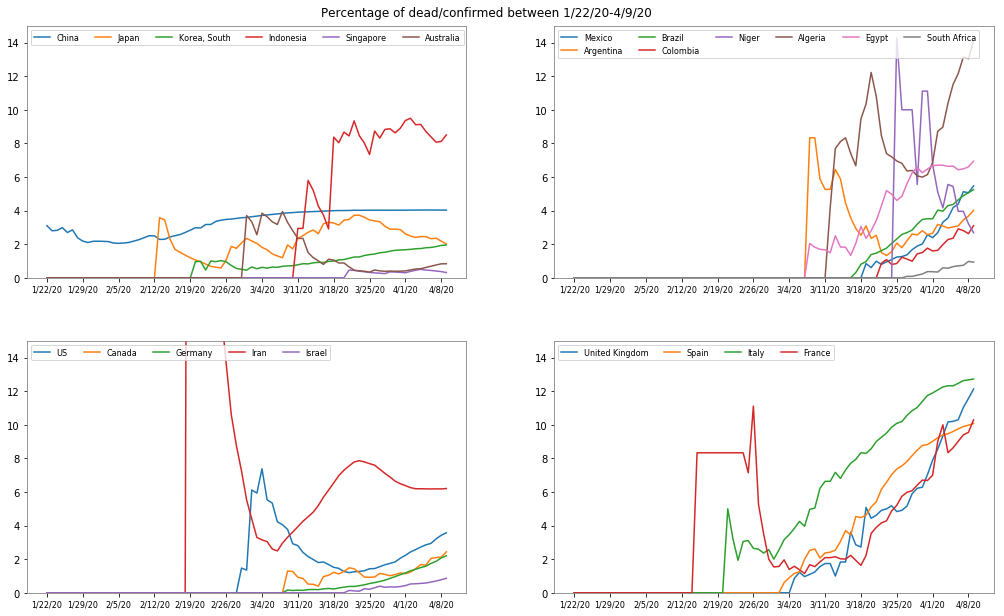

In [355]:
# ---------------------------------------------
# All relative to the starting days of the pandemia
figu=plotCFRTS(cfr,dates,regions,countries, move2start=0)
strCFR='tsam_COVID19_JHU_cfr_fromFirstCaseInChina.png'
figu.savefig('./'+strCFR)


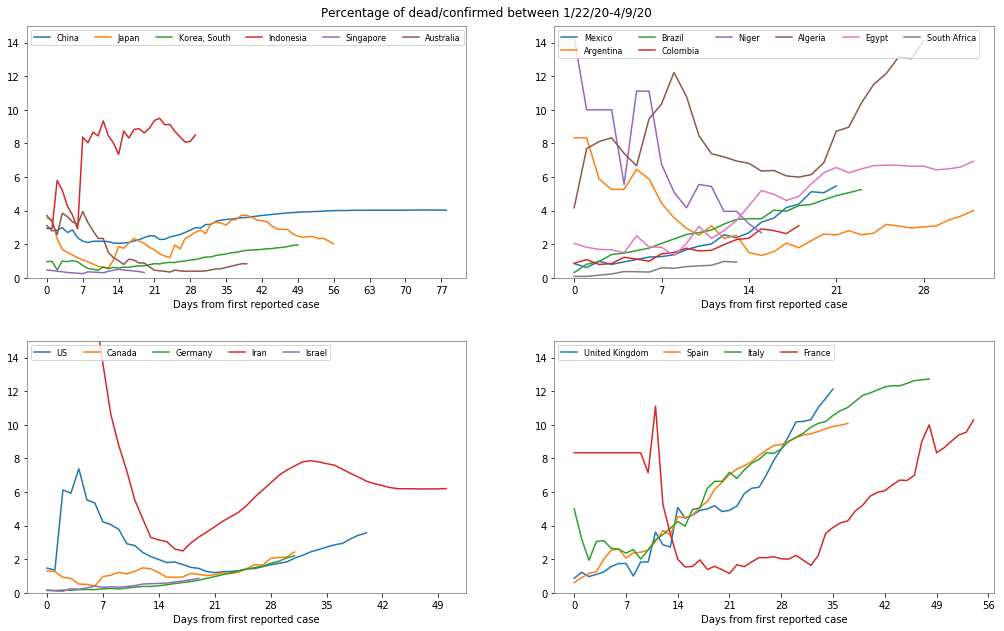

In [356]:
# ---------------------------------------------
# From the day the first case was reported
figu=plotCFRTS(cfr,dates,regions,countries, move2start=1)
strCFR='tsam_COVID19_JHU_cfr_fromFirstLocalReport.png'
figu.savefig('./'+strCFR)
# ---------------------------------------------


It is important to consider that the first few reports of deaths usually are biased by the fact that those cases are almost 

### Case fatality ratios in detail for countries reporting cases by province

The countries where there are reports by province are China, United Kingdom, Australia, and Canada. To see this, print the list of countries including repetitions.

In [357]:
countries_Cases

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'Chin

The rows that contain the data from China, for instance, are between 42 and 82, inclusive.

### CFR analysis for China, UK, and Australia, taking into account the data by province

The data will be separated into dictionaries, one for each country. 

China

In [358]:
China= {'Country name':'China'}
China['cfrTotCases']=cfr[np.where(countries=='China')[0][0]]
China['cases'], China['indsCases']= gatherDataSingleCountry(cases,'China')
China['deathCases'], China['indsDeathCases']= gatherDataSingleCountry(deaths,'China')
China['cfr'] = correctedArrayRatio(China['deathCases'],China['cases'])
China['provinces']=cases.iloc[China['indsCases'],0].to_numpy()
China['nProvinces'] = len(China['provinces'])
China['startDaysCases']= findCaseStarts(places=China['provinces'],cases=China['cases'])

UK

In [359]:
UK =  {'Country name':'UK'}
UK['cfrTotCases']=cfr[np.where(countries=='United Kingdom')[0][0]]
UK['cases'], UK['indsCases']= gatherDataSingleCountry(cases,'United Kingdom')
UK['deathCases'], UK['indsDeathCases']= gatherDataSingleCountry(deathCases,'United Kingdom')
UK['cfr'] = correctedArrayRatio(UK['deathCases'],UK['cases'])
UK['provinces']=cases.iloc[UK['indsCases'],0].to_numpy()
UK['nProvinces'] = len(UK['provinces'])
UK['startDaysCases']= findCaseStarts(places=UK['provinces'],cases=UK['cases'])

Australia

In [360]:
Australia =  {'Country name':'Australia'}
Australia['cfrTotCases']=cfr[np.where(countries=='Australia')[0][0]]
Australia['cases'], Australia['indsCases']= gatherDataSingleCountry(cases,'Australia')
Australia['deathCases'], Australia['indsDeathCases']= gatherDataSingleCountry(deathCases,'Australia')
Australia['cfr'] = correctedArrayRatio(Australia['deathCases'],Australia['cases'])
Australia['provinces']=cases.iloc[Australia['indsCases'],0].to_numpy()
Australia['nProvinces'] = len(Australia['provinces'])
Australia['startDaysCases']= findCaseStarts(places=Australia['provinces'],cases=Australia['cases'])

In [361]:
Australia['startDaysCases']

array([51,  4, 42,  7, 10, 40,  4, 38])

Plot comparisons for the three places with averages by region and comparison with the whole country average

In [362]:
def plotCFRTS_Provinces(places,dates,move2start=1):
    figu = gr.figure(figsize=(15,9))
    figu.suptitle('Percentage of dead/confirmed between %s-%s'''%(dates[0],dates[-1]))
    ax=list(); gr.ioff()
    cols=1
    rows = len(places)
    for n in range(rows*cols):
        ax.append(figu.add_subplot(rows,cols,n+1))
        place = places[n]
        print(place['Country name'])
        ticks= np.arange(0,nDays,7)
        si = place['startDaysCases'].min()
        for nn in range(len(place['provinces'])):
            thisCFR=100*place['cfr'][nn]
            ax[n].set_xticks(ticks)
            if move2start==1:
                ax[n].plot(thisCFR[si:],'-',label=place['provinces'][nn])
                ax[n].set_xlabel('Days from first reported case')
            else:
                ticks= np.arange(si,nDays,7)
                ax[n].plot(thisCFR[si:],'-',label=place['provinces'][nn])
                ax[n].set_xticklabels(dates[ticks],{'fontsize':8})
                for label in ax[n].get_xticklabels():
                    label.set_rotation(0)
                    label.set_horizontalalignment('center')
                    label.set_fontsize(8)
        avgCFR=100*place['cfr'].mean(0)
        if move2start:
            ax[n].plot(avgCFR[si:],'k-',alpha=1, lw=3,label='%s Average CFR from provinces'%place['Country name'])
            ax[n].plot(100*place['cfrTotCases'][si:],'k-',alpha=0.35, lw=5,label='CFR from total cases')
        else:
            ax[n].plot(avgCFR,'k-',alpha=1, lw=3,label=place['provinces'][nn])
            ax[n].plot(100*place['cfrTotCases'],'k-',alpha=0.35, lw=5,label='CFR from total cases')
        ax[n].set_ylim(0,10);
        ax[n].legend(ncol=6,loc='upper center',fontsize=8)
    figu.subplots_adjust(left=0.075,bottom=0.075,right=0.97,top=0.95,wspace=0.2,hspace=0.25)
    gr.ion(); gr.draw(); gr.show()
    return figu


China
Australia
UK


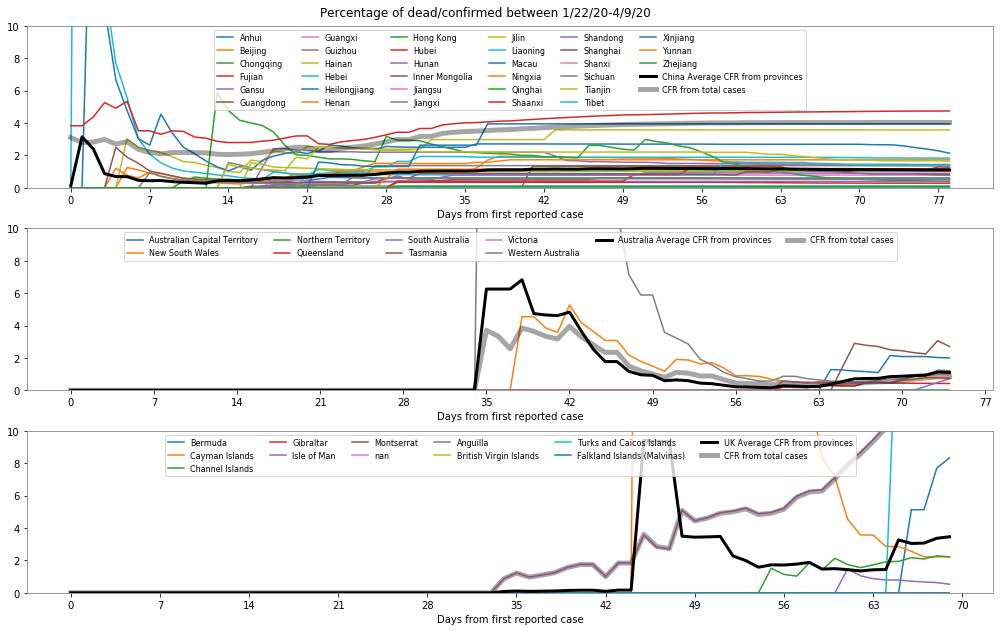

In [363]:
places = [China,Australia,UK]
#
figu=plotCFRTS_Provinces(places,dates,move2start=1)
strCFR='tsam_COVID19_JHU_cfr_ProvincesChinaUKAustralia_fromFirstReport.png'
figu.savefig('./'+strCFR)

### Predictions of CFR by age groups based on estimates from China and Italy

The rates of mortality among cases by age group have been reported in some of the countries where COVID-19 has been detected.  The probability that a person with positive SARS-CoV-2 testing dies in the hospital depends on many different factors. Some of these factors depend on the individual, including age, comorbidities like hypertension, obesity and diabetes, etcetera [(10.1016/S0140-6736(20)30566-3)](https://www.sciencedirect.com/science/article/pii/S0140673620305663). Other factors hinge on the availability of health care, and the quality of care in different countries.  Of note, the mortality in Italy, South Korea, and China, are constrasting cases of study of the known patterns patterns for CFRs results due to different conditions in these countries, different population structures, and health care policies. 

As a means to generate estimates of the CFRs from different age groups, we propose a simple calculation of proportions based on cases. Depending on an unknown factor that would account for under reporting, these estimates can be used to generate time series of CFRs by age. 

The age groups to take into account are \[0,10),\[10,20), \[20,30), \[30,40), \[40,50), \[50,60), \[60,70), \[70,80), 80+. 

The data that will be used was last estimated in February 11, 2020 for China, March 17, 2020, for Italy, and March ?? for South Korea (citar video).

There are reports of up to 20% of symptomatic cases, and in South Korea, for instance, about 50% of hospitalizations are people 60 years old or older, it is important to obtain numbers to estimate the size of a population in need for critical care. 

In [364]:
KoreaS={'ageCFR': np.array([0,0,0,0.001,0.001,0.004,0.015,0.063,0.116]),'CFR_2020?':0.02,'Country name':'KoreaS'}
Italy={'ageCFR': np.array([0,0,0,0.003,0.004,0.01,0.035,0.128,0.202]),'CFR_20200317':0.072,'Country name':'Italy'}
China['ageCFR'] = np.array([0,0.002,0.002,0.002,0.004,0.013,0.036,0.08,0.14])
China['CFR_20200211'] = 0.02
aGroups=np.arange(0,90,10)
print(len(aGroups),len(KoreaS['ageCFR']))
ageCountries=[KoreaS,Italy,China]

(9, 9)


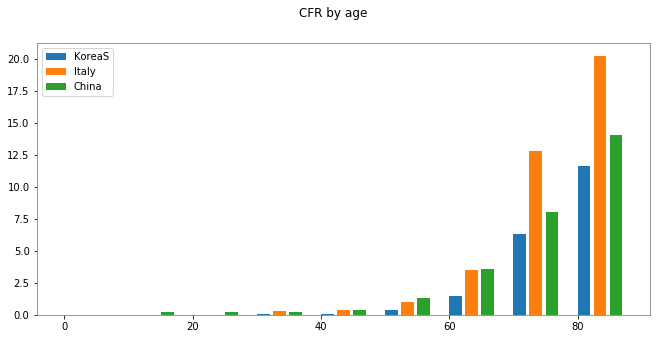

In [365]:
ages = np.arange(0,90)
f11=gr.figure(figsize=(11,5)); gr.ioff(); rows =1;cols=1
lshift=2.5;  ax=f11.add_subplot(rows,cols,1)
for n in range(len(ageCountries)):
    ax.bar(aGroups+ (n*lshift), 100*ageCountries[n]['ageCFR'],width=2,align='edge',label=ageCountries[n]['Country name']); 
ax.legend(loc='upper left')
f11.suptitle('CFR by age')
gr.ion(); gr.draw();  gr.show()

In [366]:
def sigmoid(a, aMax=0.1,a0=60.0,n=2): 
    aa = a**n
    return aMax* aa /(aa + a0**n)

These profiles are similar in that they are all increasing as a function of age, reaching a half-maximum height at ages between 50 and 60 years of age. 

We can establish qualitative estimations of the percentage of deaths based on these age CFRs. To do so, we calculate the weights of the CFRs in each age group, which represent the proportion of deaths in each group.

#### Calculation of proportions of death within cases, by age groups

Let $c_i$ represent the case-fatality ratio in $i$th age group, $i \in \left\{0,1,...,8\right\}$
The weight of the $i$th age group on the total death reported via CFRs is
$$w_i = \frac{c_i}{\sum_{j=0}^{n-1}} w_j.$$
Then the probability of death in the $i$th age group can be estimated by multiplying the CFR and the weight of the $i$th age group on the CFR. Then, multiplication by the number of cases would yield the death toll by age group. 
 

A few sutile differences can be noted from these data. For instance, the CFRs for the first 3 groups in Italy and South Korea are very similar. In Italy, the percentage of dead cases is very large among the last two age groups, which in part is due to the fact that Italians implemented a triage system that sometimes denied respirators to patients with small chances of survival. 

In [367]:
# Calculations for the different proportions 
ageCountries=[SKorea,Italy,China]
convFactor =1
for n in range(len(ageCountries)):
    C = ageCountries[n]
    print(C['Country name'])
    ageCFRweights = C['ageCFR'].sum()
    C['totCases'] = totCases[np.where(countries==C['Country name'])[0][0]]
    C['totDeathCases'] = totDeathCases[np.where(countries==C['Country name'])[0][0]]
    C['ageDeadCaseProps'] = C['ageCFR']/ageCFRweights
    C['cfrTotCases'] = cfr[np.where(countries==C['Country name'])[0][0]]
    print(C['totDeathCases'])
    print(C['ageDeadCaseProps'])
    C['totDeathCases_ageProps'] = np.zeros((len(aGroups),len(C['totDeathCases'])),'int64')
    for nn in range(len(aGroups)):
        C['totDeathCases_ageProps'][nn,:]= C['ageDeadCaseProps'][nn] * C['totCases']* C['cfrTotCases']
        print(C['totDeathCases_ageProps'][nn])

Korea, South
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   1   2   2   6   8  10  12
  13  13  16  17  28  28  35  35  42  44  50  53  54  60  66  66  72  75
  75  81  84  91  94 102 111 111 120 126 131 139 144 152 158 162 165 169
 174 177 183 186 192 200 204]
[0.    0.    0.    0.005 0.005 0.02  0.075 0.315 0.58 ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

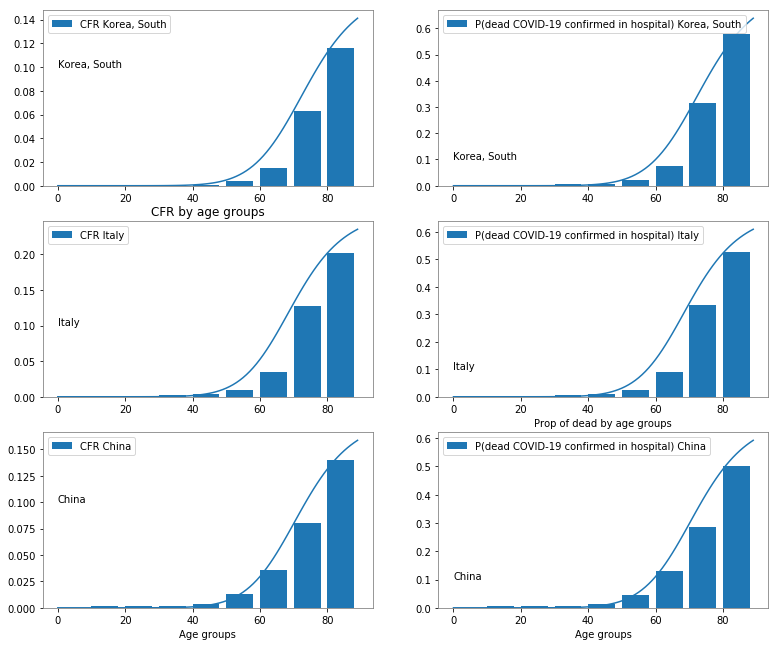

In [368]:
a0s = [74,70,72]; aMaxs=[1.4*0.12,1.3*0.202,1.3*0.14]
pMaxs=[0.76,0.68,0.68]
f10=gr.figure(figsize=(13,11)); gr.ioff(); 
axCFR=list(); axDP=list(); rows =len(ageCountries);cols=2
for n in range(len(ageCountries)):
    axCFR.append(f10.add_subplot(rows,cols,2*n+1))
    axCFR[n].text(0,0.1,ageCountries[n]['Country name'])
    axCFR[n].bar(aGroups, ageCountries[n]['ageCFR'],width=8,align='edge',label='CFR '
                 +ageCountries[n]['Country name']); 
    axCFR[n].plot(ages, sigmoid(a=ages,a0=a0s[n],aMax=aMaxs[n],n=9))
    axCFR[n].legend(loc='upper left')
    axDP.append(f10.add_subplot(rows,cols,2*n+2))
    axDP[n].text(0,0.1,ageCountries[n]['Country name'])
    axDP[n].bar(aGroups, ageCountries[n]['ageDeadCaseProps'],width=8,align='edge',
                label='P(dead COVID-19 confirmed in hospital) '+ageCountries[n]['Country name']); 
    axDP[n].plot(ages, sigmoid(a=ages,a0=a0s[n],aMax=pMaxs[n],n=9))
    axDP[n].legend(loc='upper left')
axCFR[2].set_xlabel('Age groups')
axDP[2].set_xlabel('Age groups')
axCFR[1].set_title('CFR by age groups')
axDP[1].set_xlabel('Prop of dead by age groups')
    
gr.ion(); gr.draw();  

Korea, South
Italy
China


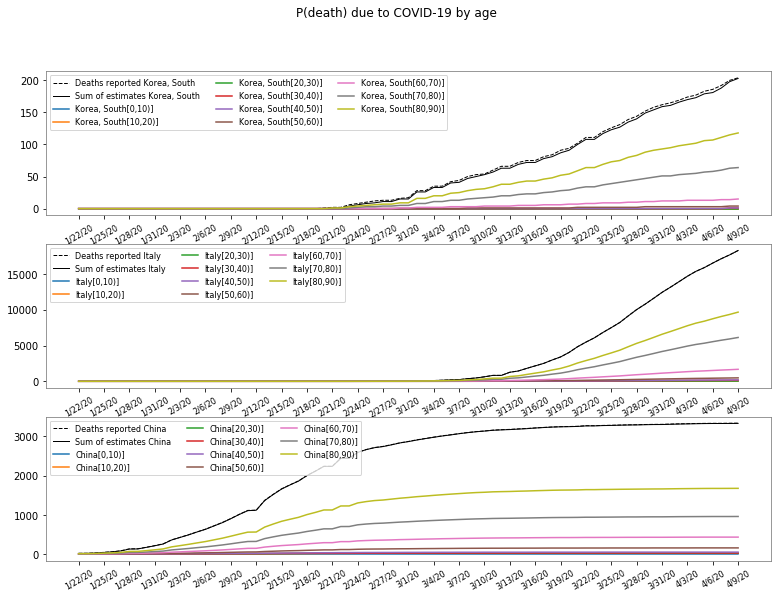

In [383]:
ages = np.arange(0,90)
f12=gr.figure(figsize=(13,9)); gr.ioff(); rows =3;cols=1
ax=list()
lshift=0.1*W; 
ticks= np.arange(0,nDays,3)
convFactor =1
for n in range(len(ageCountries)):
    ax.append(f12.add_subplot(rows,cols,n+1))
    C = ageCountries[n]
    print(C['Country name'])   
    ax[n].plot(C['totDeathCases'],'k--', alpha=1, lw=1,label='Deaths reported '+ C['Country name']);        
    ax[n].plot(C['totDeathCases_ageProps'].sum(0),'k',lw=1,label='Sum of estimates '+ C['Country name']);        
    for nn in range(len(aGroups)):
        ax[n].plot(C['totDeathCases_ageProps'][nn],label=C['Country name']+ '[%d,%d)]'%(aGroups[nn],aGroups[nn]+10));        
    ax[n].legend(loc='upper left',ncol=3, fontsize=8)
    ax[n].set_xticks(ticks)
    ax[n].set_xticklabels(dates[ticks],{'fontsize':8})
    for label in ax[n].get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('center')
        label.set_fontsize(8)

f12.suptitle('P(death) due to COVID-19 by age')
gr.ion(); gr.draw();  gr.show()

f12Name='tsam_COVID19_JHU_cfr+propDeathCasesByAgeTS.png'
f12.savefig(f12Name)


In [340]:
print(SKorea['totDeathCases'][-1],Italy['totDeathCases'][-1],China['totDeathCases'][-1])

(204, 18279, 3339)


In [341]:
print(SKorea['totDeathCases_ageProps'].sum(0)[-1])
print(Italy['totDeathCases_ageProps'].sum(0)[-1])
print(China['totDeathCases_ageProps'].sum(0)[-1])

203
18275
3333
